# Sample release for GW190521

This notebook serves as a basic introduction to loading and viewing data released in association with the publications:  
__GW190521: A Binary Black Hole Merger with a Total Mass of 150 Msun__ avaliable
through [PRL](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.125.101102), [arXiv](https://arxiv.org/abs/2009.01075), and [LIGO-P2000020](https://dcc.ligo.org/LIGO-P2000020/public).  
__Properties and astrophysical implications of the 150 Msun binary black hole merger GW190521__ avaliable
through [ApjL](https://iopscience.iop.org/article/10.3847/2041-8213/aba493), [arXiv](https://arxiv.org/abs/2009.01190), and [LIGO-P2000021](https://dcc.ligo.org/LIGO-P2000021/public).

The data used in this notebook must be downloaded from the public LIGO DCC page [LIGO-P2000158](https://dcc.ligo.org/P2000158/public).

# Data release for GW190521
In public DCC page [LIGO-P2000158](https://dcc.ligo.org/P2000158/public), you will find several data files:
* `GW190521_posterior_samples.h5` - contains parameter estimation (PE) samples from many different runs:
  * NRSur7dq4 is our "preferred" waveform model (referred to as NRSur PHM in the papers). These samples contain the info for Table 1 and Figures 2, 3, 4, 5 of [LIGO-P2000020](https://dcc.ligo.org/LIGO-P2000020/public).
  * IMRPhenomPv3HM and SEOBNRv4PHM are alternative waveform models for comparison. Those samples, along with those from NRSur7dq4, contain the info for Table 1 and Figures 1, 2, 3, 4, 5, 6, 8, 9 of [LIGO-P2000021](https://dcc.ligo.org/LIGO-P2000021/public).
* `GW190521_studies_posterior_samples.h5` - contains parameter estimation (PE) samples from runs used for specialized studies; these should not be used in preference to the previous runs for most applications.
  * The three sets of PE samples for NRSur7dq4_Lmax2, Lmax3, and Lmax4 are used for Figure 7 of [LIGO-P2000021](https://dcc.ligo.org/LIGO-P2000021/public). 
  * The set of PE samples directly using NR is used for Figure 8 of [LIGO-P2000021](https://dcc.ligo.org/LIGO-P2000021/public), and nowhere else in either paper. It has `luminosity_distance` set to 1 Mpc and redshift close to 0 for all samples, and hence all masses labeled `_source` are not actually corrected for redshift. The radiated energy also does not have the redshift correction. The remnant BH properties and peak luminosity are not computed using spin evolution and are thus slightly less accurate than for other runs.
  * The set of PE samples for NRSur7dq4_nospin and NRSur7dq4_spinaligned are used for computing Bayes Factors for spin and for higher multipoles, and for the hierarchical analysis described in Section 5.2.1 and Figures 11 and 12 of [LIGO-P2000021](https://dcc.ligo.org/LIGO-P2000021/public). 
* `GW190521_Ringdown_samples.tgz` is a tarball containing nine more h5 files with posterior samples for the ringdown analysis described in Section 3.2 and Figure 9 of [LIGO-P2000021](https://dcc.ligo.org/LIGO-P2000021/public).
* `GW190521_Implications_figure_data.tgz` is a tarball containing additional data needed to make Figures 5, 10, 11, 12, and 13 in [LIGO-P2000021](https://dcc.ligo.org/LIGO-P2000021/public), including skymaps fits files.
* `GW190521_discovery_Fig1.tgz` is a tarball containing additional data needed to make Figure 1 in [LIGO-P2000020](https://dcc.ligo.org/LIGO-P2000020/public).
* `GW190521_discovery_figs_pdf.tgz` - tarball containing all the figures from the GW190521 discovery paper [LIGO-P2000020](https://dcc.ligo.org/LIGO-P2000020/public), in pdf.
* `GW190521_Implications_Figures_pdf.tgz` - tarball containing all the figures in the GW190521 implications paper [LIGO-P2000021](https://dcc.ligo.org/LIGO-P2000021/public), in pdf.
* `GW190521_md5sums.txt` - containing md5sums for each of the h5 files.

In this notebook we will primarily use the data in the file `GW190521_posterior_samples.h5` .

The data file can be read in using the `PESummary` or `h5py` libraries. For this notebook we'll start with simple stuff using h5py. Then we'll use `PESummary v0.7.0` to read the data  files as well as for plotting. For general instructions on how to manipulate the data file and/or read this data file with `h5py`, see the [PESummary docs](https://lscsoft.docs.ligo.org/pesummary/data/reading_the_metafile.html).

In [1]:
%matplotlib inline

# import useful python packages
import numpy as np
import matplotlib.pyplot as plt
import h5py

Some simple stuff with "vanilla" h5py

In [2]:
# read in the data
fn = "GW190521_posterior_samples.h5"
data = h5py.File(fn,'r')

In [3]:
# browse the entire file
print('Contents of',fn,':')
for k1 in data.keys():
    for k2 in data[k1].keys():
        try:
            if (data[k1][k2].size == 1):
                print(k1,k2,data[k1][k2][0])
            else:
                print(k1,k2,data[k1][k2].shape)
        except:
            try:
                print(k1,k2,data[k1][k2].keys())
            except:
                try:
                    print(k1,k2,data[k1][k2])
                except:
                    print(k1,k2,'No data')
    

Contents of GW190521_posterior_samples.h5 :
IMRPhenomPv3HM approximant b'IMRPhenomPv3HM'
IMRPhenomPv3HM calibration_envelope <KeysViewHDF5 ['H1', 'L1', 'V1']>
IMRPhenomPv3HM config_file <KeysViewHDF5 ['analysis', 'bayeswave', 'condor', 'data', 'datafind', 'engine', 'input', 'lalinference', 'ligo-skymap-from-samples', 'ligo-skymap-plot', 'mpi', 'paths', 'ppanalysis', 'resultspage', 'singularity', 'skyarea', 'statevector']>
IMRPhenomPv3HM injection_data <KeysViewHDF5 ['injection_values']>
IMRPhenomPv3HM meta_data <KeysViewHDF5 ['meta_data', 'other', 'sampler']>
IMRPhenomPv3HM posterior_samples (49263,)
IMRPhenomPv3HM priors <KeysViewHDF5 ['calibration', 'samples']>
IMRPhenomPv3HM psds <KeysViewHDF5 ['H1', 'L1', 'V1']>
IMRPhenomPv3HM skymap <KeysViewHDF5 ['data', 'meta_data']>
IMRPhenomPv3HM version b'3.0'
NRSur7dq4 approximant b'NRSur7dq4'
NRSur7dq4 calibration_envelope <KeysViewHDF5 ['H1', 'L1', 'V1']>
NRSur7dq4 config_file <KeysViewHDF5 ['analysis', 'bayeswave', 'condor', 'data', 'data

In [4]:
# print out top-level data structures: waveform models
print(' ')
print('Top-level data structures:',data.keys())

# extract posterior samples for preferred waveform model
waveform = 'NRSur7dq4'
print(' ')
print('Data products for preferred waveform model,',waveform,':',data[waveform].keys())

# parameter names:
posterior_samples = data[waveform]['posterior_samples']
pnames = posterior_samples.dtype.fields.keys()
print('parameter names:',pnames)

# extract the samples data into an numpy array:
samples = np.array(posterior_samples).T

 
Top-level data structures: <KeysViewHDF5 ['IMRPhenomPv3HM', 'NRSur7dq4', 'SEOBNRv4PHM', 'history', 'version']>
 
Data products for preferred waveform model, NRSur7dq4 : <KeysViewHDF5 ['approximant', 'calibration_envelope', 'config_file', 'injection_data', 'meta_data', 'posterior_samples', 'priors', 'psds', 'version']>
parameter names: dict_keys(['H1_matched_filter_abs_snr', 'H1_matched_filter_snr_angle', 'H1_optimal_snr', 'H1_spcal_amp_0', 'H1_spcal_amp_1', 'H1_spcal_amp_2', 'H1_spcal_amp_3', 'H1_spcal_amp_4', 'H1_spcal_amp_5', 'H1_spcal_amp_6', 'H1_spcal_amp_7', 'H1_spcal_amp_8', 'H1_spcal_amp_9', 'H1_spcal_phase_0', 'H1_spcal_phase_1', 'H1_spcal_phase_2', 'H1_spcal_phase_3', 'H1_spcal_phase_4', 'H1_spcal_phase_5', 'H1_spcal_phase_6', 'H1_spcal_phase_7', 'H1_spcal_phase_8', 'H1_spcal_phase_9', 'L1_matched_filter_abs_snr', 'L1_matched_filter_snr_angle', 'L1_optimal_snr', 'L1_spcal_amp_0', 'L1_spcal_amp_1', 'L1_spcal_amp_2', 'L1_spcal_amp_3', 'L1_spcal_amp_4', 'L1_spcal_amp_5', 'L1_sp

dL shape, mean, std = (65723,) 5265.994269405796 1464.1349618502252


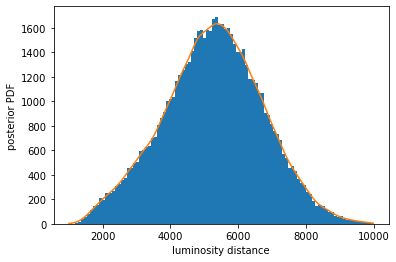

In [5]:
# get samples for one of the parameters
dL = samples['luminosity_distance']
print('dL shape, mean, std =',dL.shape,dL.mean(),dL.std())

# smooth it
from scipy.stats.kde import gaussian_kde
hs = gaussian_kde(dL)

# histogram, and overlay the smoothed PDF
plt.figure()
h, b, o = plt.hist(dL,bins=100)
hsmoothed = hs(b)*len(dL)*(b[1]-b[0])
plt.plot(b,hsmoothed)
plt.xlabel('luminosity distance')
plt.ylabel('posterior PDF')
plt.show()

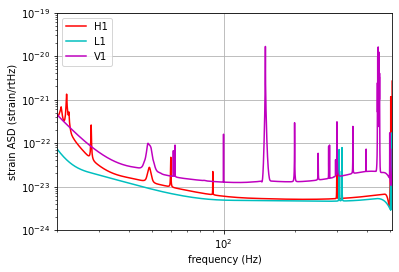

In [6]:
# plot the PSDs used in this analysis
H1psd = data[waveform]['psds']['H1']
L1psd = data[waveform]['psds']['L1']
V1psd = data[waveform]['psds']['V1']
colors = {'H1':'r','L1':'c','V1':'m'}

plt.figure()
for ifo in data[waveform]['psds'].keys():
    fr = data[waveform]['psds'][ifo][()].T[0]
    asd = np.sqrt(data[waveform]['psds'][ifo][()].T[1])
    plt.loglog(fr,asd,colors[ifo],label=ifo)
plt.xlabel('frequency (Hz)')
plt.ylabel('strain ASD (strain/rtHz)')
plt.xlim([20,512])
plt.ylim([1.e-24,1.e-19])
plt.grid('both')
plt.legend()
plt.show()

The main results in the paper are based on these waveform models:  
['NRSur7dq4','IMRPhenomPv3HM', 'SEOBNRv4PHM']  
where the preferred waveform model is 'NRSur7dq4' .  

Some of the paper content is drawn from other waveform models:  
[ 'NR', , 'NRSur7dq4_Lmax2', 'NRSur7dq4_Lmax2_coprecessing_modes', 'NRSur7dq4_Lmax3', 'NRSur7dq4_Lmax4', 'NRSur7dq4_aligned']  
which we won't explore here.

Now extract the parameter values for each of the three waveform models, for Table 1

In [7]:
# compile and print out the data for Table 1 of the implications paper
from IPython.display import HTML, display

# this function returns confidence intervals for a parameter 
def confidence_range(posterior,parameter,level):
    
    posterior_for_parameter = posterior[parameter]
    
    median = np.percentile(posterior_for_parameter,50)
    lower_bound = - median + np.percentile(posterior_for_parameter,(100-level)/2.)
    upper_bound = - median + np.percentile(posterior_for_parameter,100-(100-level)/2.)
    
    # round to 4 digit precision
    nsig = -int(np.floor(np.log10(np.abs(upper_bound)))) + (4 - 1)
    median = np.around(median,nsig)
    lower_bound = np.around(lower_bound,nsig)
    upper_bound = np.around(upper_bound,nsig)
    
    return(median,upper_bound,lower_bound)

################
# read in the posterior samples, get medians and 90% CIs:
fn = "GW190521_posterior_samples.h5"
data = h5py.File(fn,'r')

waveforms = ['NRSur7dq4', 'IMRPhenomPv3HM', 'SEOBNRv4PHM']

inspiral_parameters = ['mass_1_source', 'mass_2_source', 'total_mass_source','chirp_mass_source', 'mass_ratio',
                       'mass_1', 'mass_2', 'total_mass','chirp_mass', 
                       'a_1', 'a_2', 'tilt_1', 'tilt_2' , 'chi_eff', 'chi_p','final_mass_source', 'final_spin',
                       'radiated_energy', 'peak_luminosity','luminosity_distance', 'redshift', 'ra', 'dec'] 

results = []
for parameter in inspiral_parameters:   
    result = [parameter]
    for waveform in waveforms:
        samples = data[waveform]['posterior_samples']
        try:
            r = confidence_range(samples,parameter,90)
            result.append(r)
        except: 
            g=0
    
    results.append(result)
    # print some latex code. It will need to be hacked...
    #print(f'{result[0]} & ${result[1]}'+'^{'+f'{result[2]}'+'}_{'+f'{result[3]}'+'}$ \\\\')

# print a nicely formatted table for reading
print('Parameter',waveforms[0],waveforms[1],waveforms[2])
    
display(HTML(
       '<table><tr>{}</tr></table>'.format(
           '</tr><tr>'.join(
               '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in results)
           )
    ))
    
    

Parameter NRSur7dq4 IMRPhenomPv3HM SEOBNRv4PHM


Compute probabilities that the source frame masses are in the nominal PISN mass gap

In [8]:
waveforms = ['NRSur7dq4', 'IMRPhenomPv3HM', 'SEOBNRv4PHM']
nsig = 1
for waveform in waveforms:
    samples = data[waveform]['posterior_samples']
    m1 = samples['mass_1_source']
    m2 = samples['mass_2_source']
    Nsamp = m1.size
    print(waveform,'Nsamples',m1.size)
    print('P(m1<=65) =',round(m1[m1<=65.].size/Nsamp*100.,nsig),'%')
    print('P(m1<=50) =',round(m1[m1<=50.].size/Nsamp*100.,nsig),'%')
    print('P(m1<=120) =',round(m1[m1<=120.].size/Nsamp*100.,nsig),'%')
    print('P(m2<=65) =',round(m2[m2<=65.].size/Nsamp*100.,nsig),'%')
    print('P(m2<=50) =',round(m2[m2<=50.].size/Nsamp*100.,nsig),'%')
    print('P(m2<=120) =',round(m2[m2<=120.].size/Nsamp*100.,nsig),'%')

    mm = m1[((m1<65.) | (m1>120.)) & ((m2<65.) | (m2>120.))]
    print('P(m1,m2 not in [65,120]) = ',round(mm.size/m1.size*100.,nsig),'%')
    mm = m1[((m1>65.) & (m1<120.)) | ((m2>65.) & (m2<120.))]
    print('P(m1 or m2 in [65,120]) = ',round(mm.size/m1.size*100.,nsig),'%')
    print(' ')



NRSur7dq4 Nsamples 65723
P(m1<=65) = 0.3 %
P(m1<=50) = 0.0 %
P(m1<=120) = 99.1 %
P(m2<=65) = 46.2 %
P(m2<=50) = 6.6 %
P(m2<=120) = 100.0 %
P(m1,m2 not in [65,120]) =  1.0 %
P(m1 or m2 in [65,120]) =  99.0 %
 
IMRPhenomPv3HM Nsamples 49263
P(m1<=65) = 0.0 %
P(m1<=50) = 0.0 %
P(m1<=120) = 97.7 %
P(m2<=65) = 50.2 %
P(m2<=50) = 8.8 %
P(m2<=120) = 100.0 %
P(m1,m2 not in [65,120]) =  2.0 %
P(m1 or m2 in [65,120]) =  98.0 %
 
SEOBNRv4PHM Nsamples 19822
P(m1<=65) = 0.0 %
P(m1<=50) = 0.0 %
P(m1<=120) = 88.0 %
P(m2<=65) = 34.8 %
P(m2<=50) = 10.1 %
P(m2<=120) = 100.0 %
P(m1,m2 not in [65,120]) =  9.8 %
P(m1 or m2 in [65,120]) =  90.2 %
 


In [9]:
# we also need some numbers from HM runs, so read those in:
studies_samples_fn = "GW190521_studies_posterior_samples.h5"
studies_samples_data = h5py.File(studies_samples_fn,'r')

hm_waveforms = ['NRSur7dq4_Lmax2','NRSur7dq4_Lmax4']
hm_parameters = ['mass_1_source', 'mass_2_source', 'mass_ratio', 'chi_eff', 'chi_p','luminosity_distance', 'redshift','iota']
hm_results = []
for parameter in hm_parameters:   
    result = [parameter]
    for waveform in hm_waveforms:
        samples = studies_samples_data[waveform]['posterior_samples']
        try:
            r = confidence_range(samples,parameter,90)
            result.append(r)
        except: 
            g=0
    
    hm_results.append(result)

# print a nicely formatted table for reading
print('Parameter',hm_waveforms[0],hm_waveforms[1])
    
display(HTML(
       '<table><tr>{}</tr></table>'.format(
           '</tr><tr>'.join(
               '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in hm_results)
           )
    ))
    


Parameter NRSur7dq4_Lmax2 NRSur7dq4_Lmax4


In [10]:
# compute Bayes Factors for spin precession and HMs.

def get_BF_data(BF_data):
    BFn = BF_data['meta_data']['sampler']['ln_bayes_factor'][0]
    lnz = BF_data['meta_data']['sampler']['ln_evidence'][0]
    H   = BF_data['meta_data']['other']['information_nats'][0]
    nsamp = BF_data['meta_data']['sampler']['nsamples'][0]
    nlive = BF_data['meta_data']['other']['number_live_points'][0]
    return BFn, lnz, H, nsamp, nlive

# # get BF(s/n), ln(evidence), information gain (nats) Nsamples and live points for the reference model:
BF1, lnz1, H1, nsamp1, nlive1 = get_BF_data(data['NRSur7dq4'])
print('NRSur PHM','BFs/n, lnz, H, nsamp, nlive =', BF1, lnz1, round(H1,2), nsamp1, nlive1,'\n')

# models to compare:
BFinputs = {'aligned spin': studies_samples_data['NRSur7dq4_spinaligned'], 
            'No spin':      studies_samples_data['NRSur7dq4_nospin'], 
            'Only l2m2':    studies_samples_data['NRSur7dq4_l2m2']}

print("GW190521 Bayes factor of NRSur PHM vs:")
for k in BFinputs.keys():
    # get BF(s/n), ln(evidence), information gain (nats) Nsamples and live points for alternative models
    BF2, lnz2, H2, nsamp2, nlive2 = get_BF_data(BFinputs[k])
    print(k,'BFs/n, lnz, H, nsamp, nlive =', BF2, lnz2, round(H2,2), nsamp2, nlive2)
    # compute bayes factor between models
    bf = np.exp(lnz1 - lnz2) 
    # compute theoretical error in the natural log of BF (Skilling p.844)
    delta_ln_bf = np.sqrt(H1/nlive1+ H2/nlive2)
    # compute BF upper and lower limits
    bf_p = bf*np.exp(delta_ln_bf)
    bf_m = bf*np.exp(-delta_ln_bf)
    # print out the log10 BFs
    print('\t log_10 BF = %.3f +%.3f -%.3f' % (np.log10(bf), np.log10(bf_p/bf), np.log10(bf/bf_m)))


NRSur PHM BFs/n, lnz, H, nsamp, nlive = 84.49 -11938.02 21.71 65723 2048 

GW190521 Bayes factor of NRSur PHM vs:
aligned spin BFs/n, lnz, H, nsamp, nlive = 82.06 -11940.45 20.78 63594 2048
	 log_10 BF = 1.055 +0.063 -0.063
No spin BFs/n, lnz, H, nsamp, nlive = 82.37 -11940.14 20.45 55894 2048
	 log_10 BF = 0.921 +0.062 -0.062
Only l2m2 BFs/n, lnz, H, nsamp, nlive = 85.36 -11937.15 22.47 72060 2048
	 log_10 BF = -0.378 +0.064 -0.064


In [11]:
# Done with simple stuff using `h5py` ; release memory for the data
del data
del studies_samples_data

Now use PESummary (v0.7.0 or greater) to read the data files as well as for plotting. 

In [12]:
# import ligo-specific python packages. 
# pesummary is a ligo-specific python package 
# for reading and plotting the results of Bayesian parameter estimation.
# Install with "pip install pesummary" , and make sure you have version >= 0.7.0.
import pesummary
from pesummary.gw.file.read import read
print(pesummary.__version__)

0.7.0


There are 3 different waveform models that were used to analyze __GW190521__ and they are all stored in the data file.

In [13]:
fn = "GW190521_posterior_samples.h5"
data = read(fn)
labels = data.labels
print(labels)

['IMRPhenomPv3HM', 'NRSur7dq4', 'SEOBNRv4PHM']


To illustrate the data structure we'll pick the preferred waveform model and plot its parameter samples.

In [14]:
waveform = "NRSur7dq4"
samples_dict = data.samples_dict
posterior_samples = samples_dict[waveform]
prior_samples = data.priors["samples"][waveform]
parameters = posterior_samples.keys()
print(parameters)

dict_keys(['H1_matched_filter_abs_snr', 'H1_matched_filter_snr_angle', 'H1_optimal_snr', 'H1_spcal_amp_0', 'H1_spcal_amp_1', 'H1_spcal_amp_2', 'H1_spcal_amp_3', 'H1_spcal_amp_4', 'H1_spcal_amp_5', 'H1_spcal_amp_6', 'H1_spcal_amp_7', 'H1_spcal_amp_8', 'H1_spcal_amp_9', 'H1_spcal_phase_0', 'H1_spcal_phase_1', 'H1_spcal_phase_2', 'H1_spcal_phase_3', 'H1_spcal_phase_4', 'H1_spcal_phase_5', 'H1_spcal_phase_6', 'H1_spcal_phase_7', 'H1_spcal_phase_8', 'H1_spcal_phase_9', 'L1_matched_filter_abs_snr', 'L1_matched_filter_snr_angle', 'L1_optimal_snr', 'L1_spcal_amp_0', 'L1_spcal_amp_1', 'L1_spcal_amp_2', 'L1_spcal_amp_3', 'L1_spcal_amp_4', 'L1_spcal_amp_5', 'L1_spcal_amp_6', 'L1_spcal_amp_7', 'L1_spcal_amp_8', 'L1_spcal_amp_9', 'L1_spcal_phase_0', 'L1_spcal_phase_1', 'L1_spcal_phase_2', 'L1_spcal_phase_3', 'L1_spcal_phase_4', 'L1_spcal_phase_5', 'L1_spcal_phase_6', 'L1_spcal_phase_7', 'L1_spcal_phase_8', 'L1_spcal_phase_9', 'V1_matched_filter_abs_snr', 'V1_matched_filter_snr_angle', 'V1_optimal_s

As an example, we'll show the different posterior distributions derived for a single waveform and the posterior distribution derived using the different approximants for the `luminosity_distance` parameter.

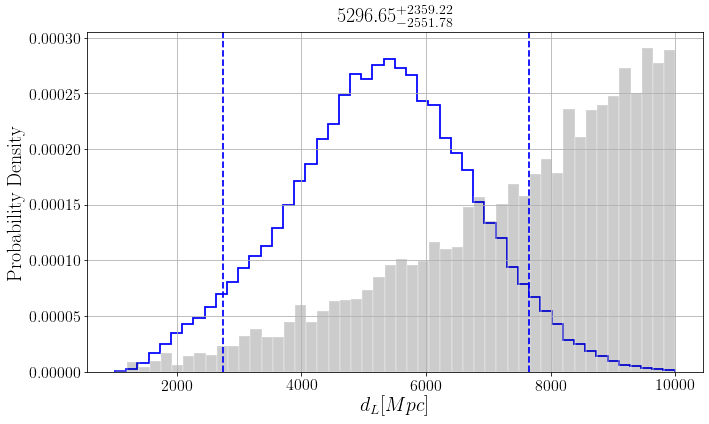

In [15]:
parameter = "luminosity_distance"
fig = posterior_samples.plot(parameter, type="hist", prior=prior_samples[parameter])
fig.set_size_inches(12, 8)
plt.show()

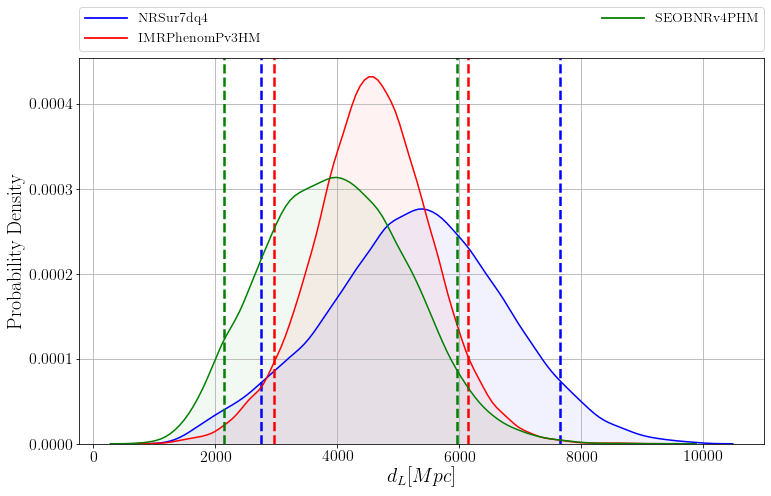

In [16]:
parameter = "luminosity_distance"
waveforms = ['NRSur7dq4', 'IMRPhenomPv3HM', 'SEOBNRv4PHM']
fig = samples_dict.plot(parameter, type="hist", kde=True, labels=waveforms)
fig.set_size_inches(12, 8)
plt.show()

Make a corner plot (this takes some time):

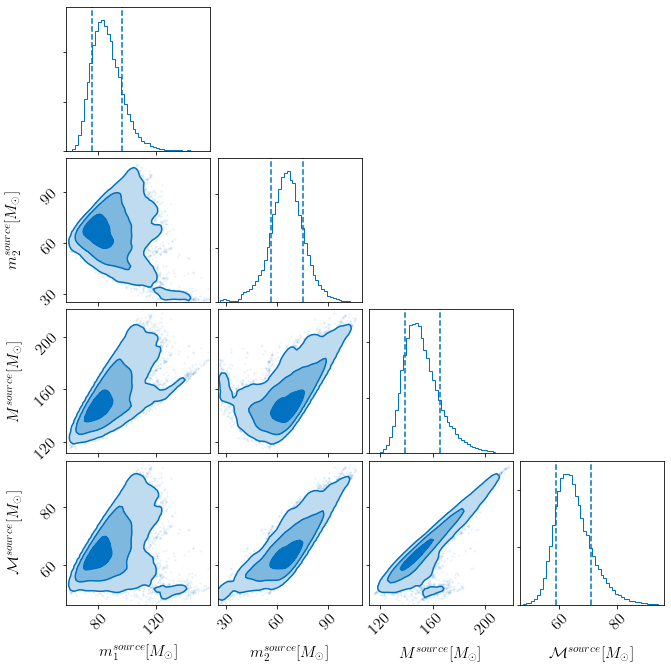

In [17]:
fig = posterior_samples.plot(type="corner", parameters=["mass_1_source", "mass_2_source", 
                                                        "chirp_mass_source", "total_mass_source"])
plt.show()


The psds that were used for each analysis can also be extracted from this file and plotted

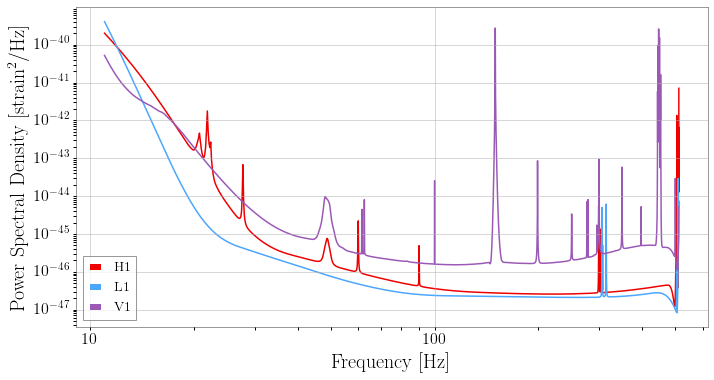

In [18]:
psd = data.psd[waveform]
fig = psd.plot(fmin=11.)
fig.set_size_inches(12, 8)
plt.show()

The calibration envelopes that were used in this analysis can also be extracted from this file and plotted

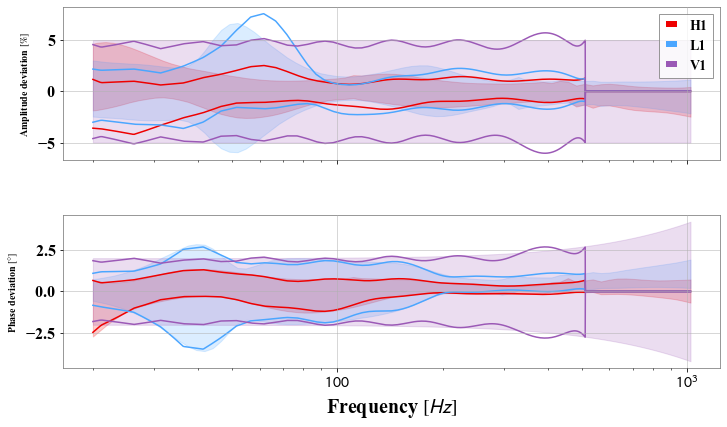

In [19]:
from pesummary.gw.plots.plot import _calibration_envelope_plot

prior = data.priors["calibration"]["NRSur7dq4"]
calibration = data.calibration["NRSur7dq4"]
ifos = list(calibration.keys())
frequencies = np.arange(20., 1024., 1. / 4)
calibration_data, prior_data = [], []
for ifo in ifos:
    calibration_data.append(np.array(calibration[ifo]))
    prior_data.append(np.array(prior[ifo]))
fig = _calibration_envelope_plot(frequencies, calibration_data, ifos, prior=prior_data)
fig.set_size_inches(12, 8)
plt.show()

The configuration file that were used for each analysis can also be extracted from this file

In [20]:
config = data.config["NRSur7dq4"]
for i in config.keys():
    print("[{}]".format(i))
    for key, item in config[i].items():
        print("{}={}".format(key, item))   # .decode("utf-8")
    print("\n")

[analysis]
coherence-test=False
dataseed=1234
engine=lalinferencenest
ifos=['H1', 'L1', 'V1']
nparallel=4
osg=False
randomseed=4321
roq=False
service-url=https://gracedb.ligo.org/api/
singularity=False
upload-to-gracedb=False


[bayeswave]


[condor]
accounting_group=ligo.prod.o3.cbc.pe.lalinference
accounting_group_user=max.isi
coherencetest=/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py37//bin/lalinference_coherence_test
combinePTMCMCh5script=/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py37//bin/cbcBayesCombinePTMCMCh5s
computeroqweights=/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py37//bin/lalinference_compute_roq_weights
datafind=/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py37//bin/gw_data_find
gracedb=/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py37//bin/gracedb
lalinferencebambi=/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py37//bin/lalinference_bambi
lalinferencedatadump=/cvmfs/oasis.opensciencegrid.or